In [3]:
import numpy as np
import scanpy as sc
import pandas as pd 
import anndata
import json

In [6]:
adata = anndata.read_h5ad('../data/sc_reference.h5ad')
adata.obs.rctd_cluster -= 1
adata.obs.rctd_cluster = adata.obs.rctd_cluster.astype('category')
adata

AnnData object with n_obs × n_vars = 16679 × 16960
    obs: 'rctd_cluster'

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
sc.set_figure_params(dpi=80, color_map='viridis')

In [9]:
genes = adata.to_df().columns
len(genes)

16960

In [10]:
import itertools 

marker_genes_dict = {
    'Naive': ['Cd44'],
    'Tfh': ['Bcl6', 'Cxcr5', 'Pdcd1', 'Icos'],
    'Th2': ['Gata3', 'Il4', 'Prdm1', 'Stat6', 'Il2ra', 'Gata3'],
    'Th1': ['Tbx21', 'Ifng'],
    'B-cell': ['Cd79a', 'Ms4a1'],
    'T-cell': ['Ptprc', 'Rpsa', 'Ccr7', 'Cd8a', 'Cd4'],
    'Dendritic': ['Cd24a', 'Cd40', 'Cd80', 'Cd86', 'Batf3'],
    'Treg': ['Foxp3'],
    'NK': ['Nkg7'],
    'Myeloid': ['Cst3'],
    }

marker_genes = list(itertools.chain(*marker_genes_dict.values()))
filtered_markers = [g for g in marker_genes if g in genes]

len(filtered_markers), len(marker_genes)

(28, 28)

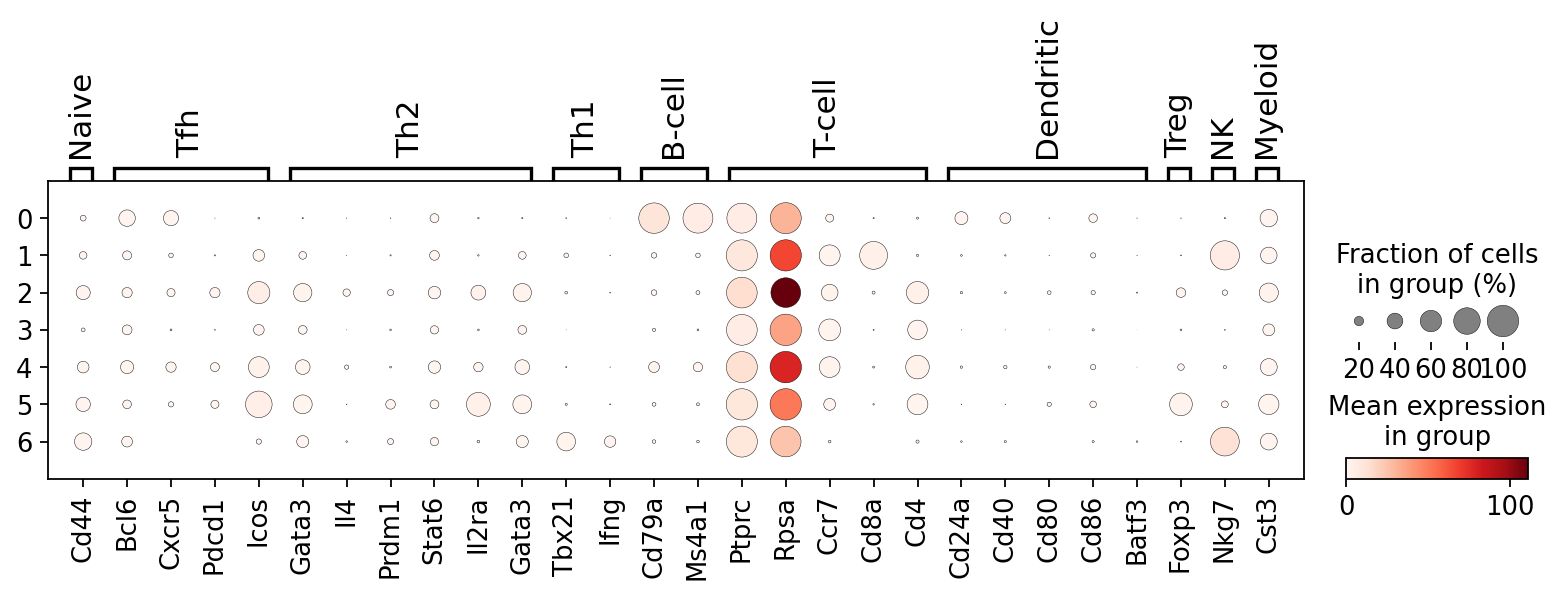

In [11]:
# ax = sc.pl.dotplot(adata, var_names=filtered_markers, groupby='rctd_cluster')
ax = sc.pl.dotplot(adata, marker_genes_dict, groupby='rctd_cluster')

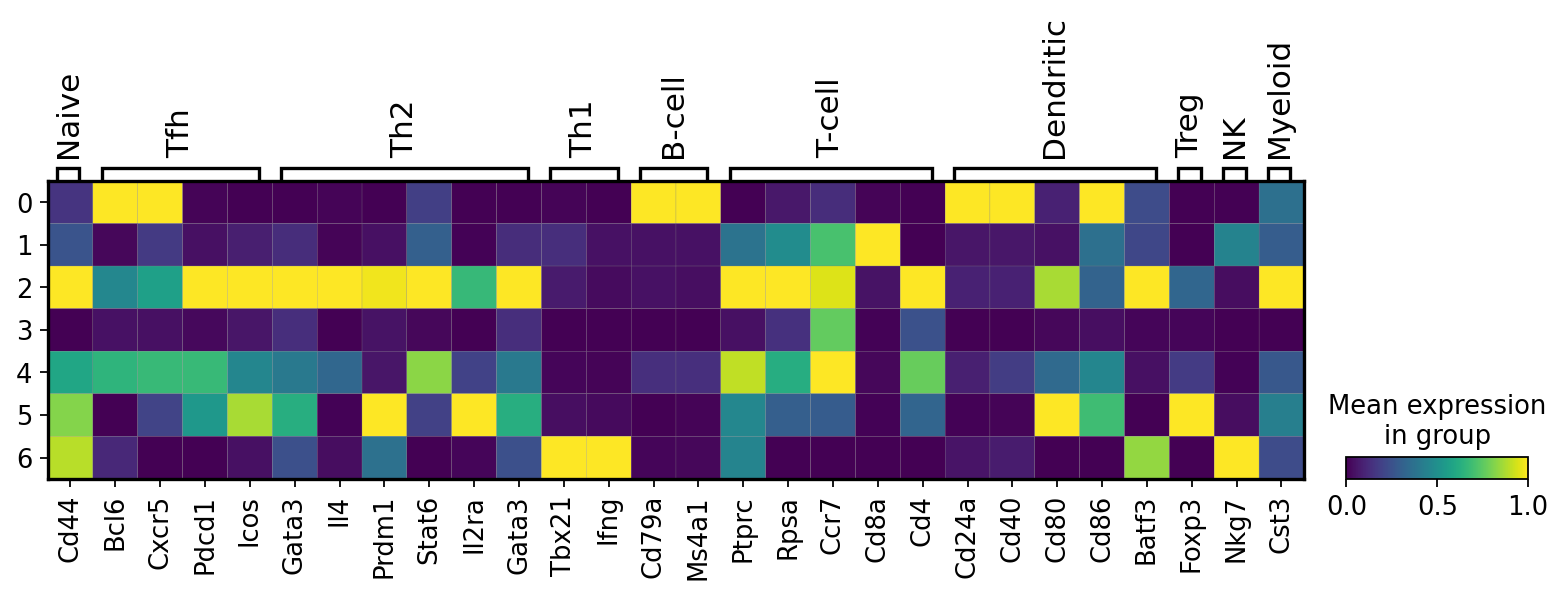

In [12]:
gs = sc.pl.matrixplot(adata, marker_genes_dict, groupby='rctd_cluster', dendrogram=False, standard_scale='var')

In [13]:
celltype_assign = {
    0: 'B-cell',
    1: 'Cd8 T-cell',
    2: 'Tfh',
    3: 'Naive',
    4: 'Tfh',
    5: 'Treg',
    6: 'Th1'
}

with open ('../data/celltype_assign.json', 'w') as f:
    json.dump(celltype_assign, f)